# Trabalho final aprendizagem de máquina


##Dupla
Edgard Henrique Coelho Tavares da Silva - 20210027041

Gabriel Vieira Coutinho - 20210139075

##Importações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_score

##Tratamento de dados básico

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/GabrielVCoutinho/Machine_Learning/main/olist_order_reviews_dataset.csv")
data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
# Preparando o dataset limpo
data_clean = data[['review_comment_message', 'review_score']].dropna(subset=['review_comment_message'])
data_clean = data_clean.rename(columns={'review_comment_message': 'texto'})
data_clean = data_clean[['texto', 'review_score']]

In [ ]:
data_clean

,texto,review_score
3,Recebi bem antes do prazo estipulado.,5
4,Parabéns lojas lannister adorei comprar pela I...,5
9,aparelho eficiente. no site a marca do aparelh...,4
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4
15,"Vendedor confiável, produto ok e entrega antes...",5
...,...,...
99205,para este produto recebi de acordo com a compr...,4
99208,Entregou dentro do prazo. O produto chegou em ...,5
99215,"O produto não foi enviado com NF, não existe v...",3
99221,"Excelente mochila, entrega super rápida. Super...",5


In [ ]:
fig = px.bar(x = np.unique(data_clean["review_score"]),
             y = [list(data_clean["review_score"]).count(i) for i in np.unique(data_clean["review_score"])] ,
             color = np.unique(data_clean["review_score"]) ,
             color_continuous_scale="Emrld")
fig.update_xaxes(title="Notas")
fig.update_yaxes(title = "Número de Reviews")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Distribuição das Notas',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
binary_data = data_clean[data_clean['review_score'].isin([1, 2, 4, 5])]
score_map = {1: 0, 2: 0, 4: 1, 5: 1}
binary_data['binary_label'] = binary_data['review_score'].map(score_map)
binary_data = binary_data[['texto', 'binary_label']]

In [ ]:
binary_data

,texto,binary_label
3,Recebi bem antes do prazo estipulado.,1
4,Parabéns lojas lannister adorei comprar pela I...,1
9,aparelho eficiente. no site a marca do aparelh...,1
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
15,"Vendedor confiável, produto ok e entrega antes...",1
...,...,...
99203,Tive um problema na entrega em que o correio c...,0
99205,para este produto recebi de acordo com a compr...,1
99208,Entregou dentro do prazo. O produto chegou em ...,1
99221,"Excelente mochila, entrega super rápida. Super...",1


In [ ]:
fig = px.bar(x = np.unique(binary_data["binary_label"]),
             y = [list(binary_data["binary_label"]).count(i) for i in np.unique(binary_data["binary_label"])] ,
             color = np.unique(binary_data["binary_label"]) ,
             color_continuous_scale="Emrld")
fig.update_xaxes(title="Notas")
fig.update_yaxes(title = "Número de Reviews")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Distribuição das Notas',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
nltk.download('stopwords')

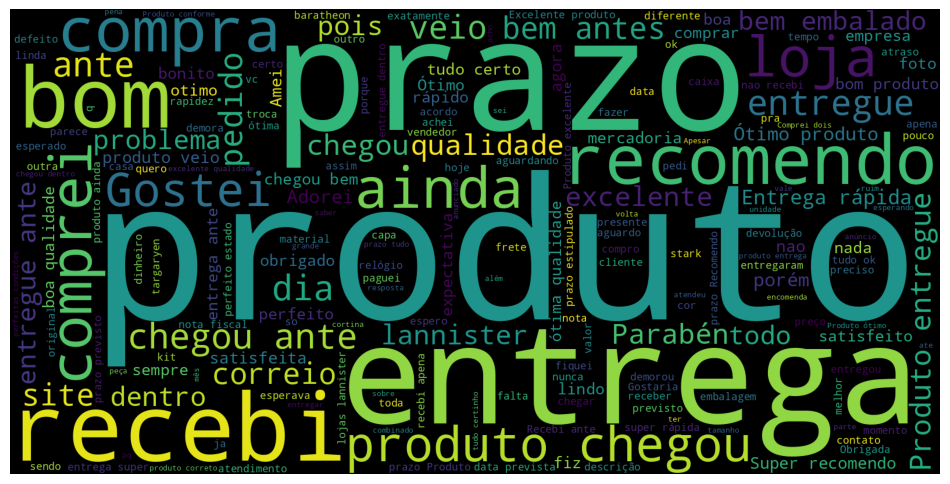

In [ ]:
stop_words = stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1600, height=800).generate(' '.join(binary_data["texto"]))
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

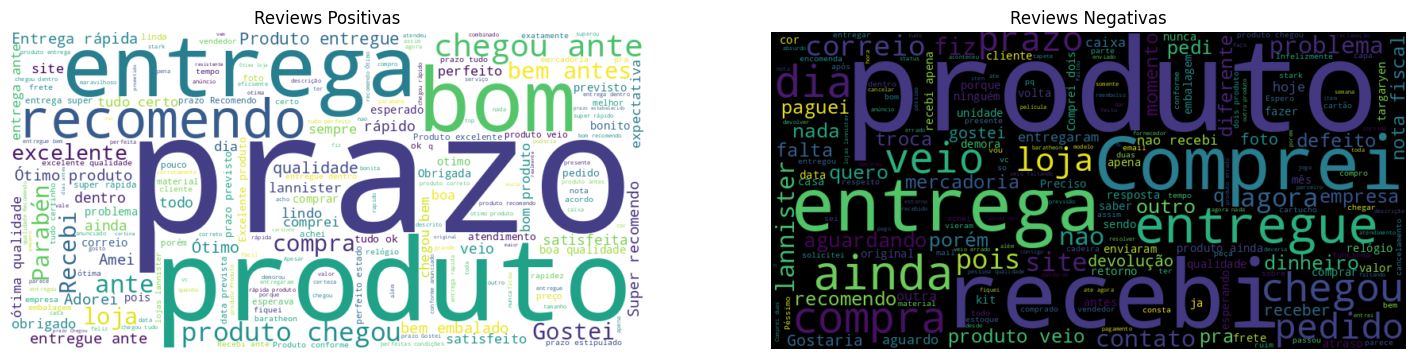

In [ ]:
positive_reviews = binary_data[binary_data['binary_label'] == 1]['texto']
negative_reviews = binary_data[binary_data['binary_label'] == 0]['texto']

wordcloud_positive = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(' '.join(positive_reviews))

wordcloud_negative = WordCloud(stopwords=stop_words, background_color="black", width=800, height=400).generate(' '.join(negative_reviews))

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Reviews Positivas')
ax[0].axis('off')

ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Reviews Negativas')
ax[1].axis('off')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(binary_data['texto'], binary_data['binary_label'], test_size=0.3, random_state=42)

In [ ]:
OOV_TOK = "<OOV>"
VOCAB_SIZE = 10000
MAX_LENGTH = 120

tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(X_train)

def preprocess(X_train, X_test, max_length, vocab_size, trunc_type='post', oov_tok = "<OOV>"):

    training_sequences = tokenizer.texts_to_sequences(X_train)
    X_train_padded = pad_sequences(training_sequences,maxlen=max_length, truncating=trunc_type)

    testing_sequences = tokenizer.texts_to_sequences(X_test)
    X_test_padded = pad_sequences(testing_sequences,maxlen=max_length)

    return X_train_padded, X_test_padded

X_train, X_test = preprocess(X_train, X_test, MAX_LENGTH, VOCAB_SIZE)

##Rede Neural

In [ ]:
num_train_examples = X_train.shape[0]
num_test_examples = X_test.shape[0]
print(f"Exemplos de Treino: {num_train_examples}")
print(f"Exemplos de Teste: {num_test_examples}")

Exemplos de Treino: 26194
Exemplos de Teste: 11226


In [ ]:
num_examples = len(X_train)

# Criando a arquitetura da rede neural
rn = Sequential()
rn.add(Dense(31, input_dim=MAX_LENGTH, activation='tanh'))
rn.add(Dense(1, activation='sigmoid'))  # Camada de saída

# Configuração do otimizador
Adam = optimizers.Adam(learning_rate=0.01)

# Compila o modelo
rn.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])

print(rn.summary())

# Verificação da regra de ouro
total_params = rn.count_params()
required_examples = total_params * 10
print(f"Total parâmetros: {total_params}, Quantidade de exemplos necessários (Regra de Ouro): {required_examples}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 31)                3751      
                                                                 
 dense_1 (Dense)             (None, 1)                 32        
                                                                 
Total params: 3783 (14.78 KB)
Trainable params: 3783 (14.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Total parâmetros: 3783, Quantidade de exemplos necessários (Regra de Ouro): 37830


In [ ]:
BATCH_SIZE=128
earlyStoppingCallback = EarlyStopping(
    monitor='val_loss',
    mode = 'min',
    patience=15,  # Número de épocas sem melhora após as quais o treinamento será interrompido
    verbose=1,
    restore_best_weights=True
)

history = rn.fit(x = X_train,
                    y = y_train,
                    validation_data=(X_test, y_test),
                    epochs=80,
                    batch_size=BATCH_SIZE,
                    callbacks=[earlyStoppingCallback]
)
history = pd.DataFrame(history.history)

Epoch 1/80
205/205 [==============================] - 3s 8ms/step - loss: 0.5601 - accuracy: 0.7297 - val_loss: 0.5383 - val_accuracy: 0.7412
Epoch 2/80
205/205 [==============================] - 1s 5ms/step - loss: 0.5353 - accuracy: 0.7431 - val_loss: 0.5288 - val_accuracy: 0.7473
Epoch 3/80
205/205 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.7411 - val_loss: 0.5363 - val_accuracy: 0.7475
Epoch 4/80
205/205 [==============================] - 1s 3ms/step - loss: 0.5357 - accuracy: 0.7436 - val_loss: 0.5326 - val_accuracy: 0.7458
Epoch 5/80
205/205 [==============================] - 1s 3ms/step - loss: 0.5349 - accuracy: 0.7456 - val_loss: 0.5324 - val_accuracy: 0.7482
Epoch 6/80
205/205 [==============================] - 1s 3ms/step - loss: 0.5308 - accuracy: 0.7452 - val_loss: 0.5281 - val_accuracy: 0.7502
Epoch 7/80
205/205 [==============================] - 1s 3ms/step - loss: 0.5306 - accuracy: 0.7461 - val_loss: 0.5356 - val_accuracy: 0.7405
Epoch 

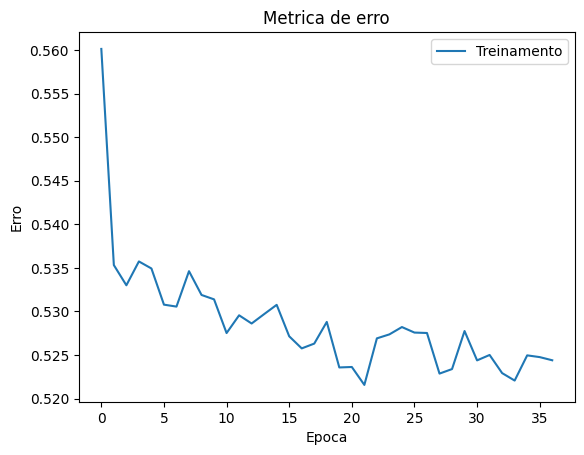

205/205 [==============================] - 1s 2ms/step
--> Acuracia (treino): 0.7462
351/351 [==============================] - 1s 2ms/step
--> Acuracia (teste): 0.7446

E_out - E_in = 0.0016


In [ ]:
plt.plot(history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

pred = np.round(rn.predict(X_train, batch_size=BATCH_SIZE))
acc_train = accuracy_score(y_train, pred)
print(f'--> Acuracia (treino): {acc_train:.4f}')

pred = np.round(rn.predict(X_test))
acc_test = accuracy_score(y_test, pred)
print(f'--> Acuracia (teste): {acc_test:.4f}')

print(f'\nE_out - E_in = {acc_train - acc_test:.4f}')

In [ ]:
x = px.line(data_frame= history , y= ["accuracy" , "val_accuracy"] ,
            markers = True )
x.update_xaxes(title="Number of Epochs",
              rangeslider_visible = True)
x.update_yaxes(title = "Accuracy")
x.update_layout(showlegend = True,
    title = {
        'text': 'Acurácia vs Número de Epocas',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
x.show()

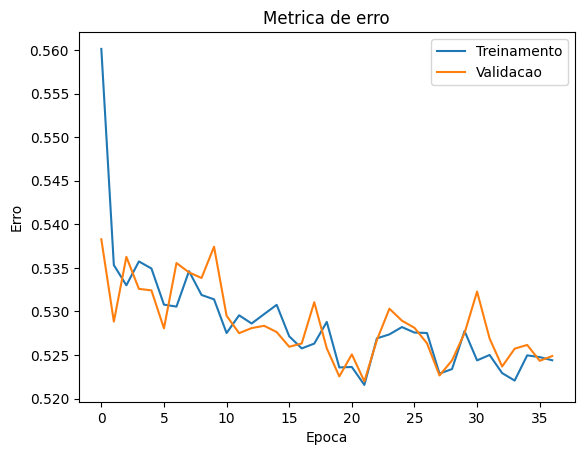

819/819 [==============================] - 1s 1ms/step
--> Acuracia (treino): 0.7462
351/351 [==============================] - 0s 1ms/step
--> Acuracia (teste): 0.7446


In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(rn.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(rn.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

234/234 [==============================] - 0s 1ms/step


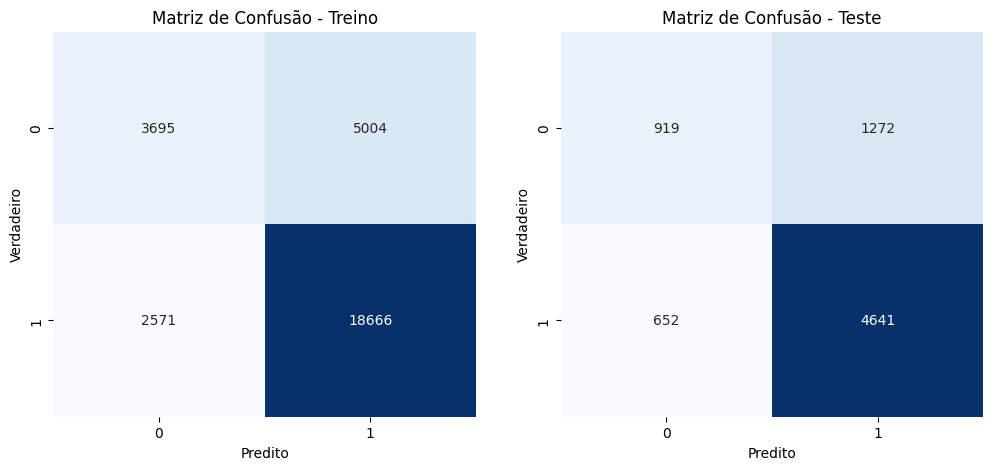

In [ ]:
# Predições nos conjuntos de treino e teste
y_pred_train = rn.predict(X_train)
rn_y_pred_test = rn.predict(X_test)

# Arredondando as previsões para obter a classificação binária
y_pred_train = np.round(y_pred_train).astype(int)
rn_y_pred_test = np.round(rn_y_pred_test).astype(int)

# Calculando a matriz de confusão
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test,rn_y_pred_test)

# Plotando a matriz de confusão para o conjunto de treino
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Treino')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Plotando a matriz de confusão para o conjunto de teste
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Teste')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

plt.show()

In [ ]:
# Gerando relatório de classificação para o conjunto de treinamento
report_train = classification_report(y_train, y_pred_train, target_names=['Review Negativa', 'Review Positiva'])
# Gerando relatório de classificação para o conjunto de teste
report_test = classification_report(y_test, rn_y_pred_test, target_names=['Review Negativa', 'Review Positiva'])

# Imprimindo os relatórios
print("Relatório de Classificação - Treino:")
print(report_train)
print("Relatório de Classificação - Teste:")
print(report_test)

Relatório de Classificação - Treino:
                 precision    recall  f1-score   support

Review Negativa       0.59      0.42      0.49      7591
Review Positiva       0.79      0.88      0.83     18603

       accuracy                           0.75     26194
      macro avg       0.69      0.65      0.66     26194
   weighted avg       0.73      0.75      0.73     26194

Relatório de Classificação - Teste:
                 precision    recall  f1-score   support

Review Negativa       0.59      0.42      0.49      3299
Review Positiva       0.78      0.88      0.83      7927

       accuracy                           0.74     11226
      macro avg       0.69      0.65      0.66     11226
   weighted avg       0.73      0.74      0.73     11226



##Árvore de Decisão

In [ ]:
# hiperparametros
VOCAB_SIZE = 10000
OOV_TOK = "<OOV>"
MAX_LENGTH = 120

In [ ]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/GabrielVCoutinho/Machine_Learning/main/olist_order_reviews_dataset.csv')
raw_data = raw_data.drop(raw_data[raw_data.review_score == 3].index)

column_text='review_comment_message'
column_score='review_score'
points_cut = [0, 2, 5]
classes = [0, 1]

df_bin = raw_data
df_bin = df_bin.dropna(subset=[column_text])
df_bin['label'] = pd.cut(df_bin[column_score], bins=points_cut, labels=classes)
df_bin = df_bin.rename(columns={column_text: 'text'})
df_bin = df_bin[['text','label']]

data_bin = df_bin

X_train, X_test, y_train, y_test = train_test_split(data_bin['text'], data_bin['label'], test_size=0.2, random_state=42)

<ipython-input-23-49dabba93a51>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(X_train)

def preprocess(X_train, X_test, max_length, vocab_size, trunc_type='post', oov_tok = "<OOV>"):

    training_sequences = tokenizer.texts_to_sequences(X_train)
    X_train_padded = pad_sequences(training_sequences,maxlen=max_length, truncating=trunc_type)

    testing_sequences = tokenizer.texts_to_sequences(X_test)
    X_test_padded = pad_sequences(testing_sequences,maxlen=max_length)

    return X_train_padded, X_test_padded

X_train, X_test = preprocess(X_train, X_test, MAX_LENGTH, VOCAB_SIZE)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calcular erros
accuracy_in = accuracy_score(y_train, y_train_pred)
E_in = 1 - accuracy_in
accuracy_out = accuracy_score(y_test, y_test_pred)
E_out = 1 - accuracy_out

# Exibir os erros
print(f"E_in (Erro dentro da amostra): {E_in:.3f}")
print(f"E_out (Erro fora da amostra): {E_out:.3f}")

E_in (Erro dentro da amostra): 0.003
E_out (Erro fora da amostra): 0.235


In [ ]:
# Gerando relatório de classificação para o conjunto de treinamento
report_train = classification_report(y_train, y_train_pred, target_names=['Review Negativa', 'Review Positiva'])
# Gerando relatório de classificação para o conjunto de teste
report_test = classification_report(y_test, y_test_pred, target_names=['Review Negativa', 'Review Positiva'])

# Imprimindo os relatórios
print("Relatório de Classificação - Treino:")
print(report_train)
print("Relatório de Classificação - Teste:")
print(report_test)

Relatório de Classificação - Treino:
                 precision    recall  f1-score   support

Review Negativa       1.00      0.99      0.99      8699
Review Positiva       1.00      1.00      1.00     21237

       accuracy                           1.00     29936
      macro avg       1.00      1.00      1.00     29936
   weighted avg       1.00      1.00      1.00     29936

Relatório de Classificação - Teste:
                 precision    recall  f1-score   support

Review Negativa       0.60      0.59      0.60      2191
Review Positiva       0.83      0.84      0.83      5293

       accuracy                           0.77      7484
      macro avg       0.72      0.72      0.72      7484
   weighted avg       0.76      0.77      0.76      7484



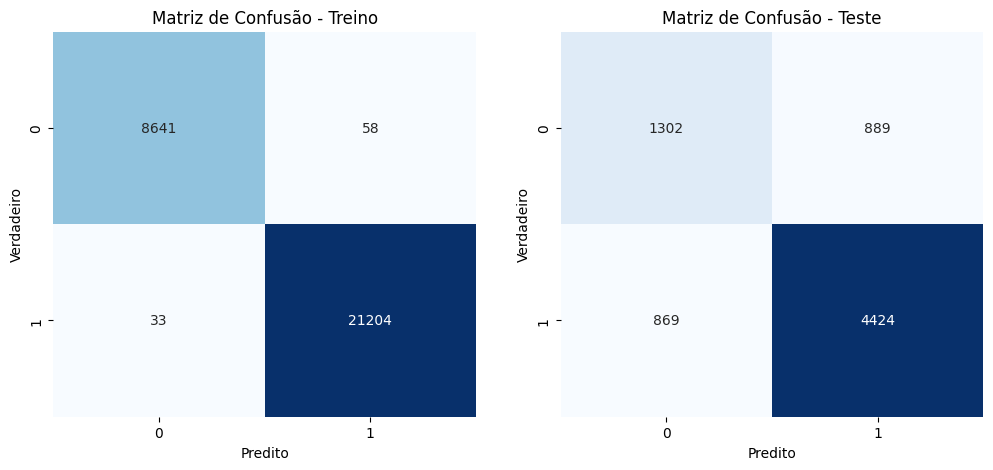

In [ ]:
# Calculando a matriz de confusão
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotando a matriz de confusão para o conjunto de treino
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Treino')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Plotando a matriz de confusão para o conjunto de teste
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Teste')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

plt.show()

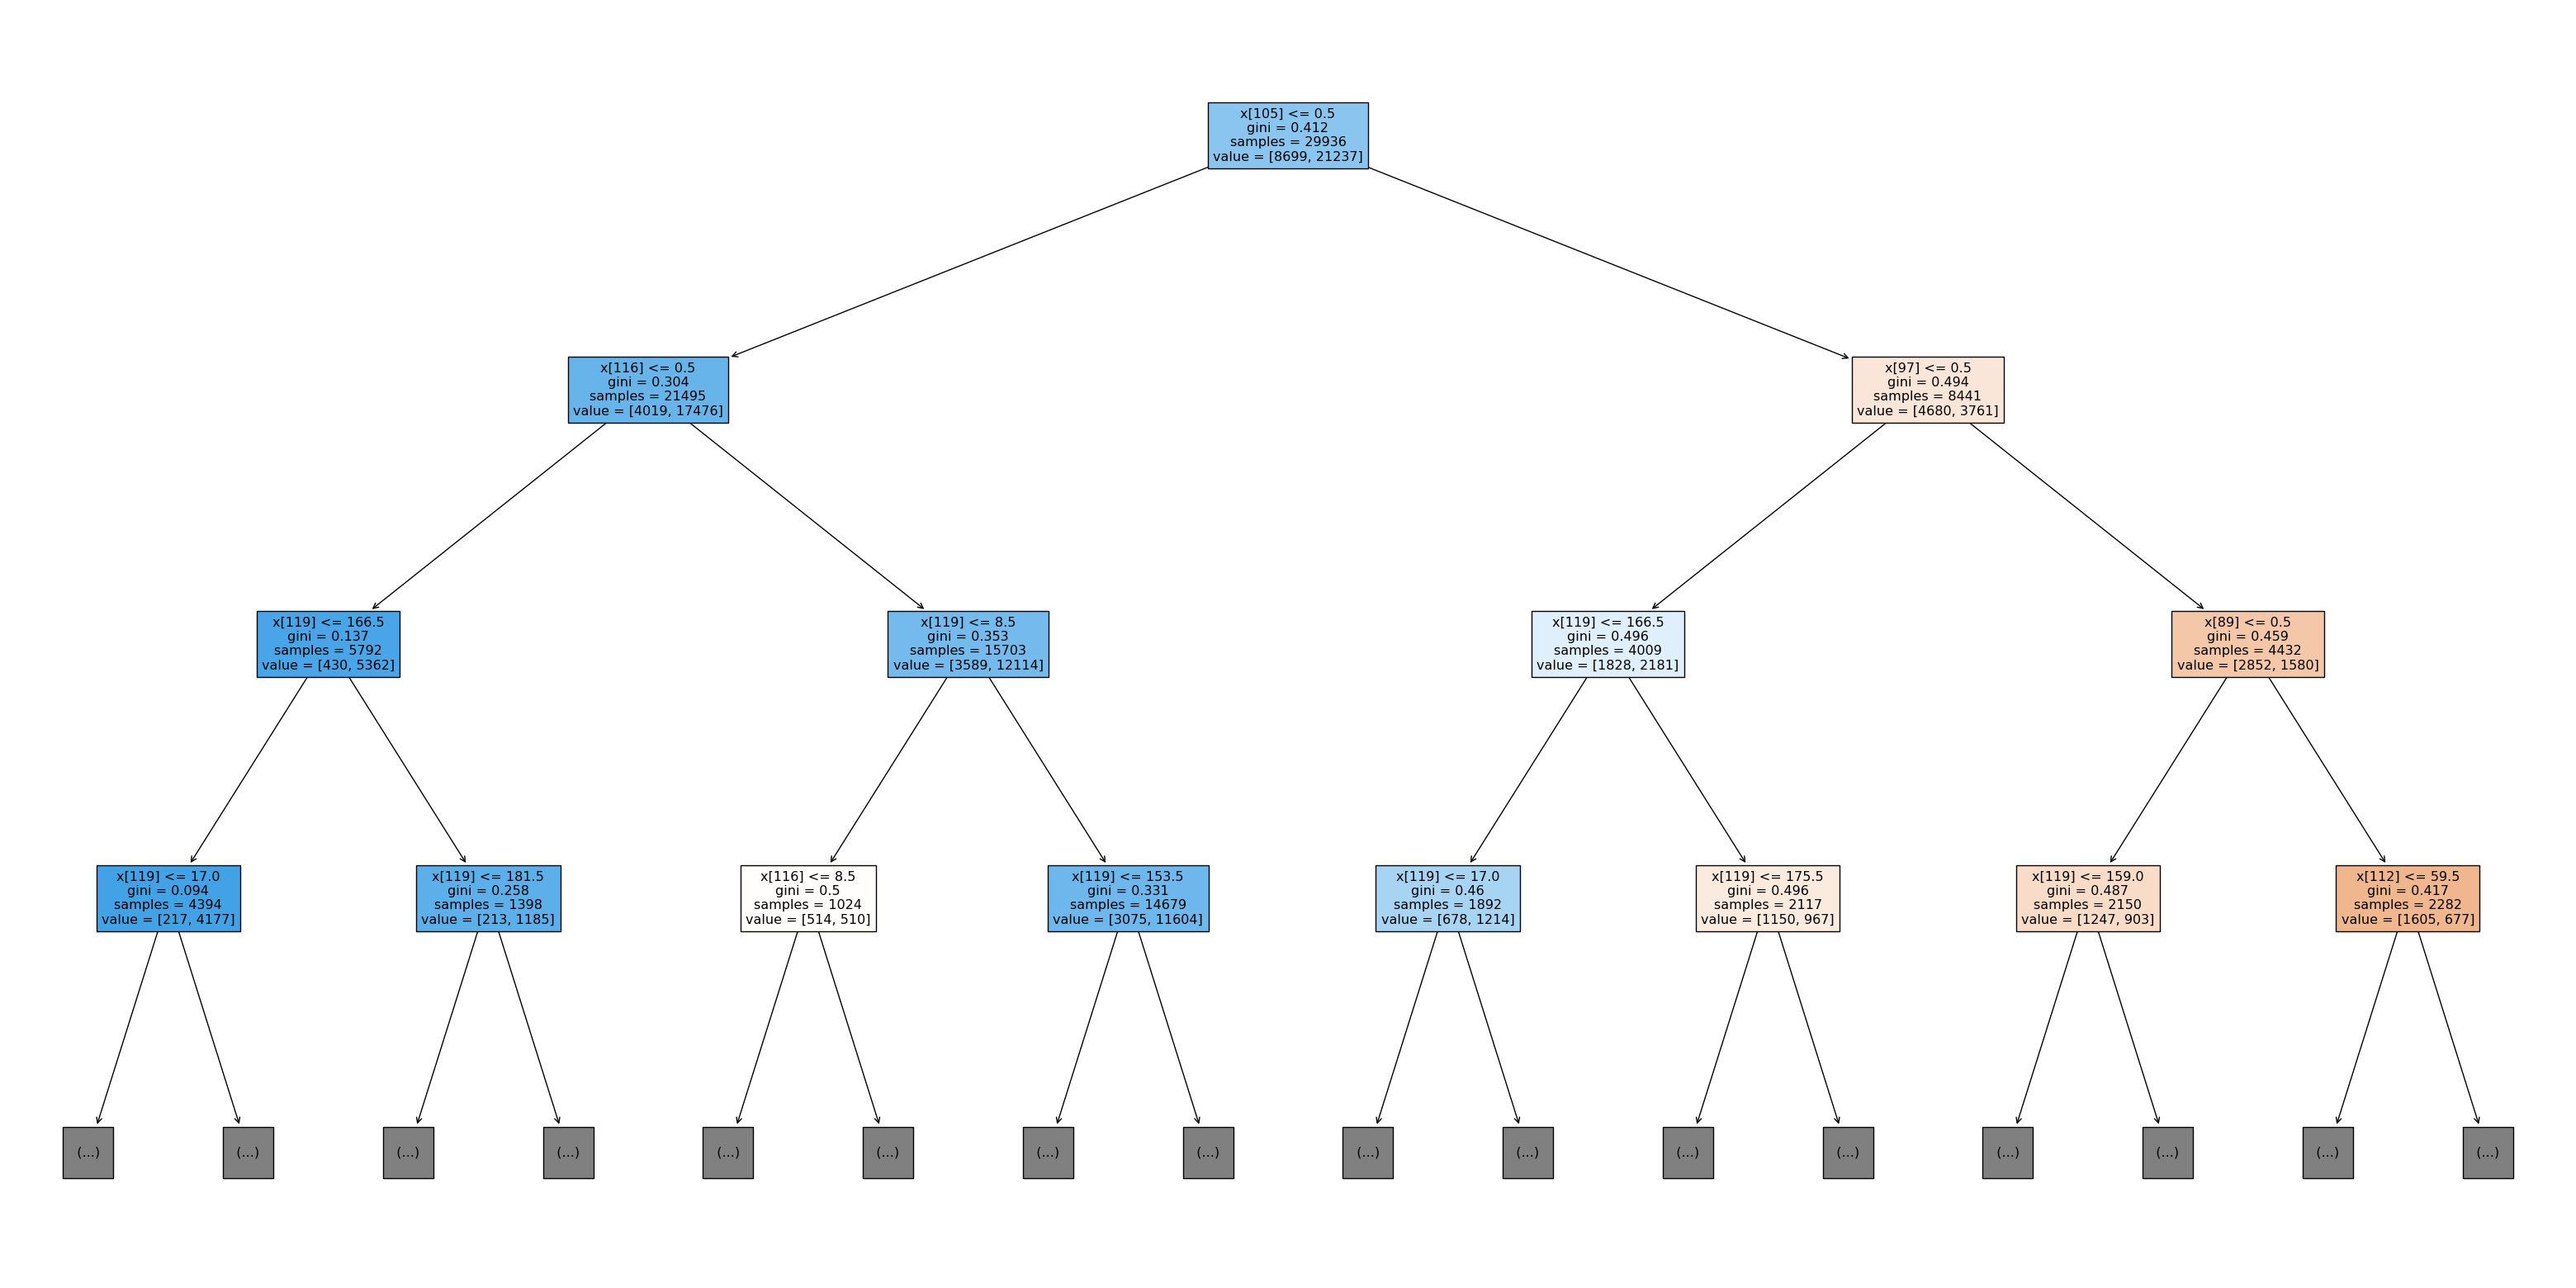

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(tree, filled=True, max_depth=3)
plt.show()

[0.00000000e+00 1.35525272e-20 7.86457198e-10 ... 5.82594318e-03
 6.73169886e-03 5.46765308e-02]
[0.00504187 0.00504187 0.00504187 ... 0.35088381 0.35761551 0.41229204]


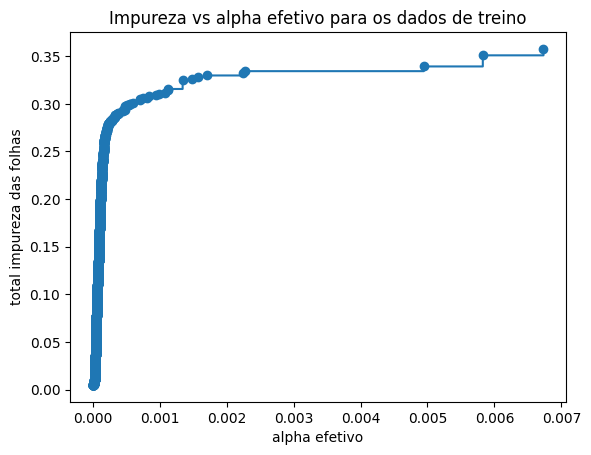

In [ ]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(ccp_alphas)
print(impurities)

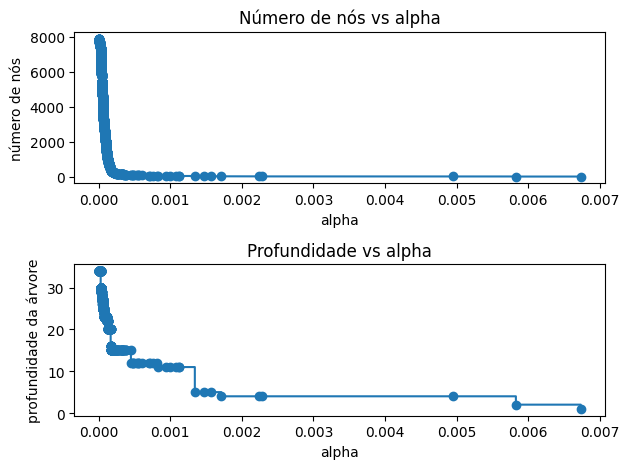

In [ ]:
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

#Descarta o último por ser trivial (apenas o nó raiz)
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

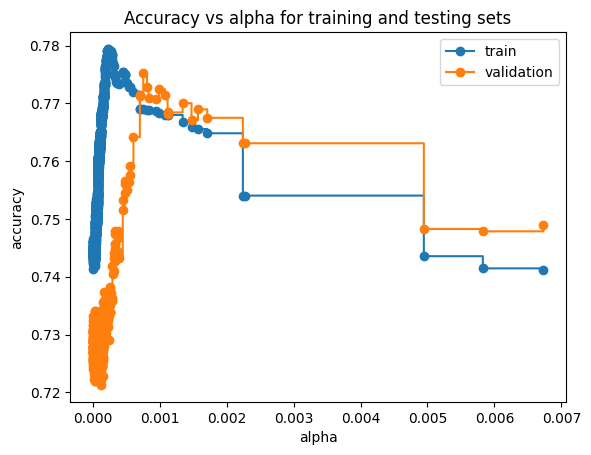

In [ ]:
kf = KFold(n_splits=5)

train_scores = [np.mean(cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')) for tree in trees]
test_scores = [np.mean(cross_val_score(tree, X_test, y_test, cv=kf, scoring='accuracy')) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
best_alpha = ccp_alphas[np.argmax(test_scores)]
print(best_alpha)

0.0007569986031824745


In [ ]:
tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calcular erros
accuracy_in = accuracy_score(y_train, y_train_pred)
E_in = 1 - accuracy_in
accuracy_out = accuracy_score(y_test, y_test_pred)
E_out = 1 - accuracy_out

# Exibir os erros
print(f"E_in (Erro dentro da amostra): {E_in:.3f}")
print(f"E_out (Erro fora da amostra): {E_out:.3f}")

E_in (Erro dentro da amostra): 0.228
E_out (Erro fora da amostra): 0.236


In [ ]:
# Gerando relatório de classificação para o conjunto de treinamento
report_train = classification_report(y_train, y_train_pred, target_names=['Review Negativa', 'Review Positiva'])
# Gerando relatório de classificação para o conjunto de teste
report_test = classification_report(y_test, y_test_pred, target_names=['Review Negativa', 'Review Positiva'])

# Imprimindo os relatórios
print("Relatório de Classificação - Treino:")
print(report_train)
print("Relatório de Classificação - Teste:")
print(report_test)

Relatório de Classificação - Treino:
                 precision    recall  f1-score   support

Review Negativa       0.62      0.54      0.58      8699
Review Positiva       0.82      0.87      0.84     21237

       accuracy                           0.77     29936
      macro avg       0.72      0.70      0.71     29936
   weighted avg       0.76      0.77      0.77     29936

Relatório de Classificação - Teste:
                 precision    recall  f1-score   support

Review Negativa       0.61      0.53      0.57      2191
Review Positiva       0.82      0.86      0.84      5293

       accuracy                           0.76      7484
      macro avg       0.71      0.69      0.70      7484
   weighted avg       0.76      0.76      0.76      7484



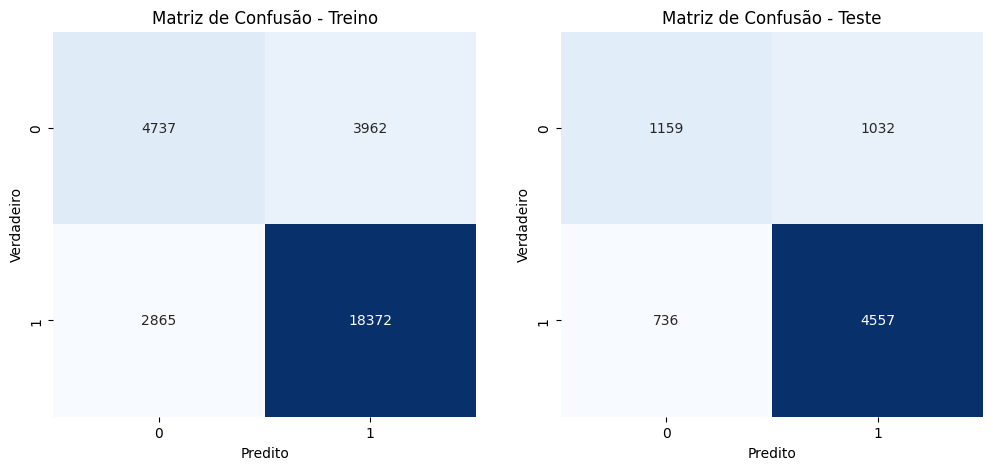

In [ ]:
# Calculando a matriz de confusão
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotando a matriz de confusão para o conjunto de treino
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Treino')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Plotando a matriz de confusão para o conjunto de teste
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Teste')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

plt.show()

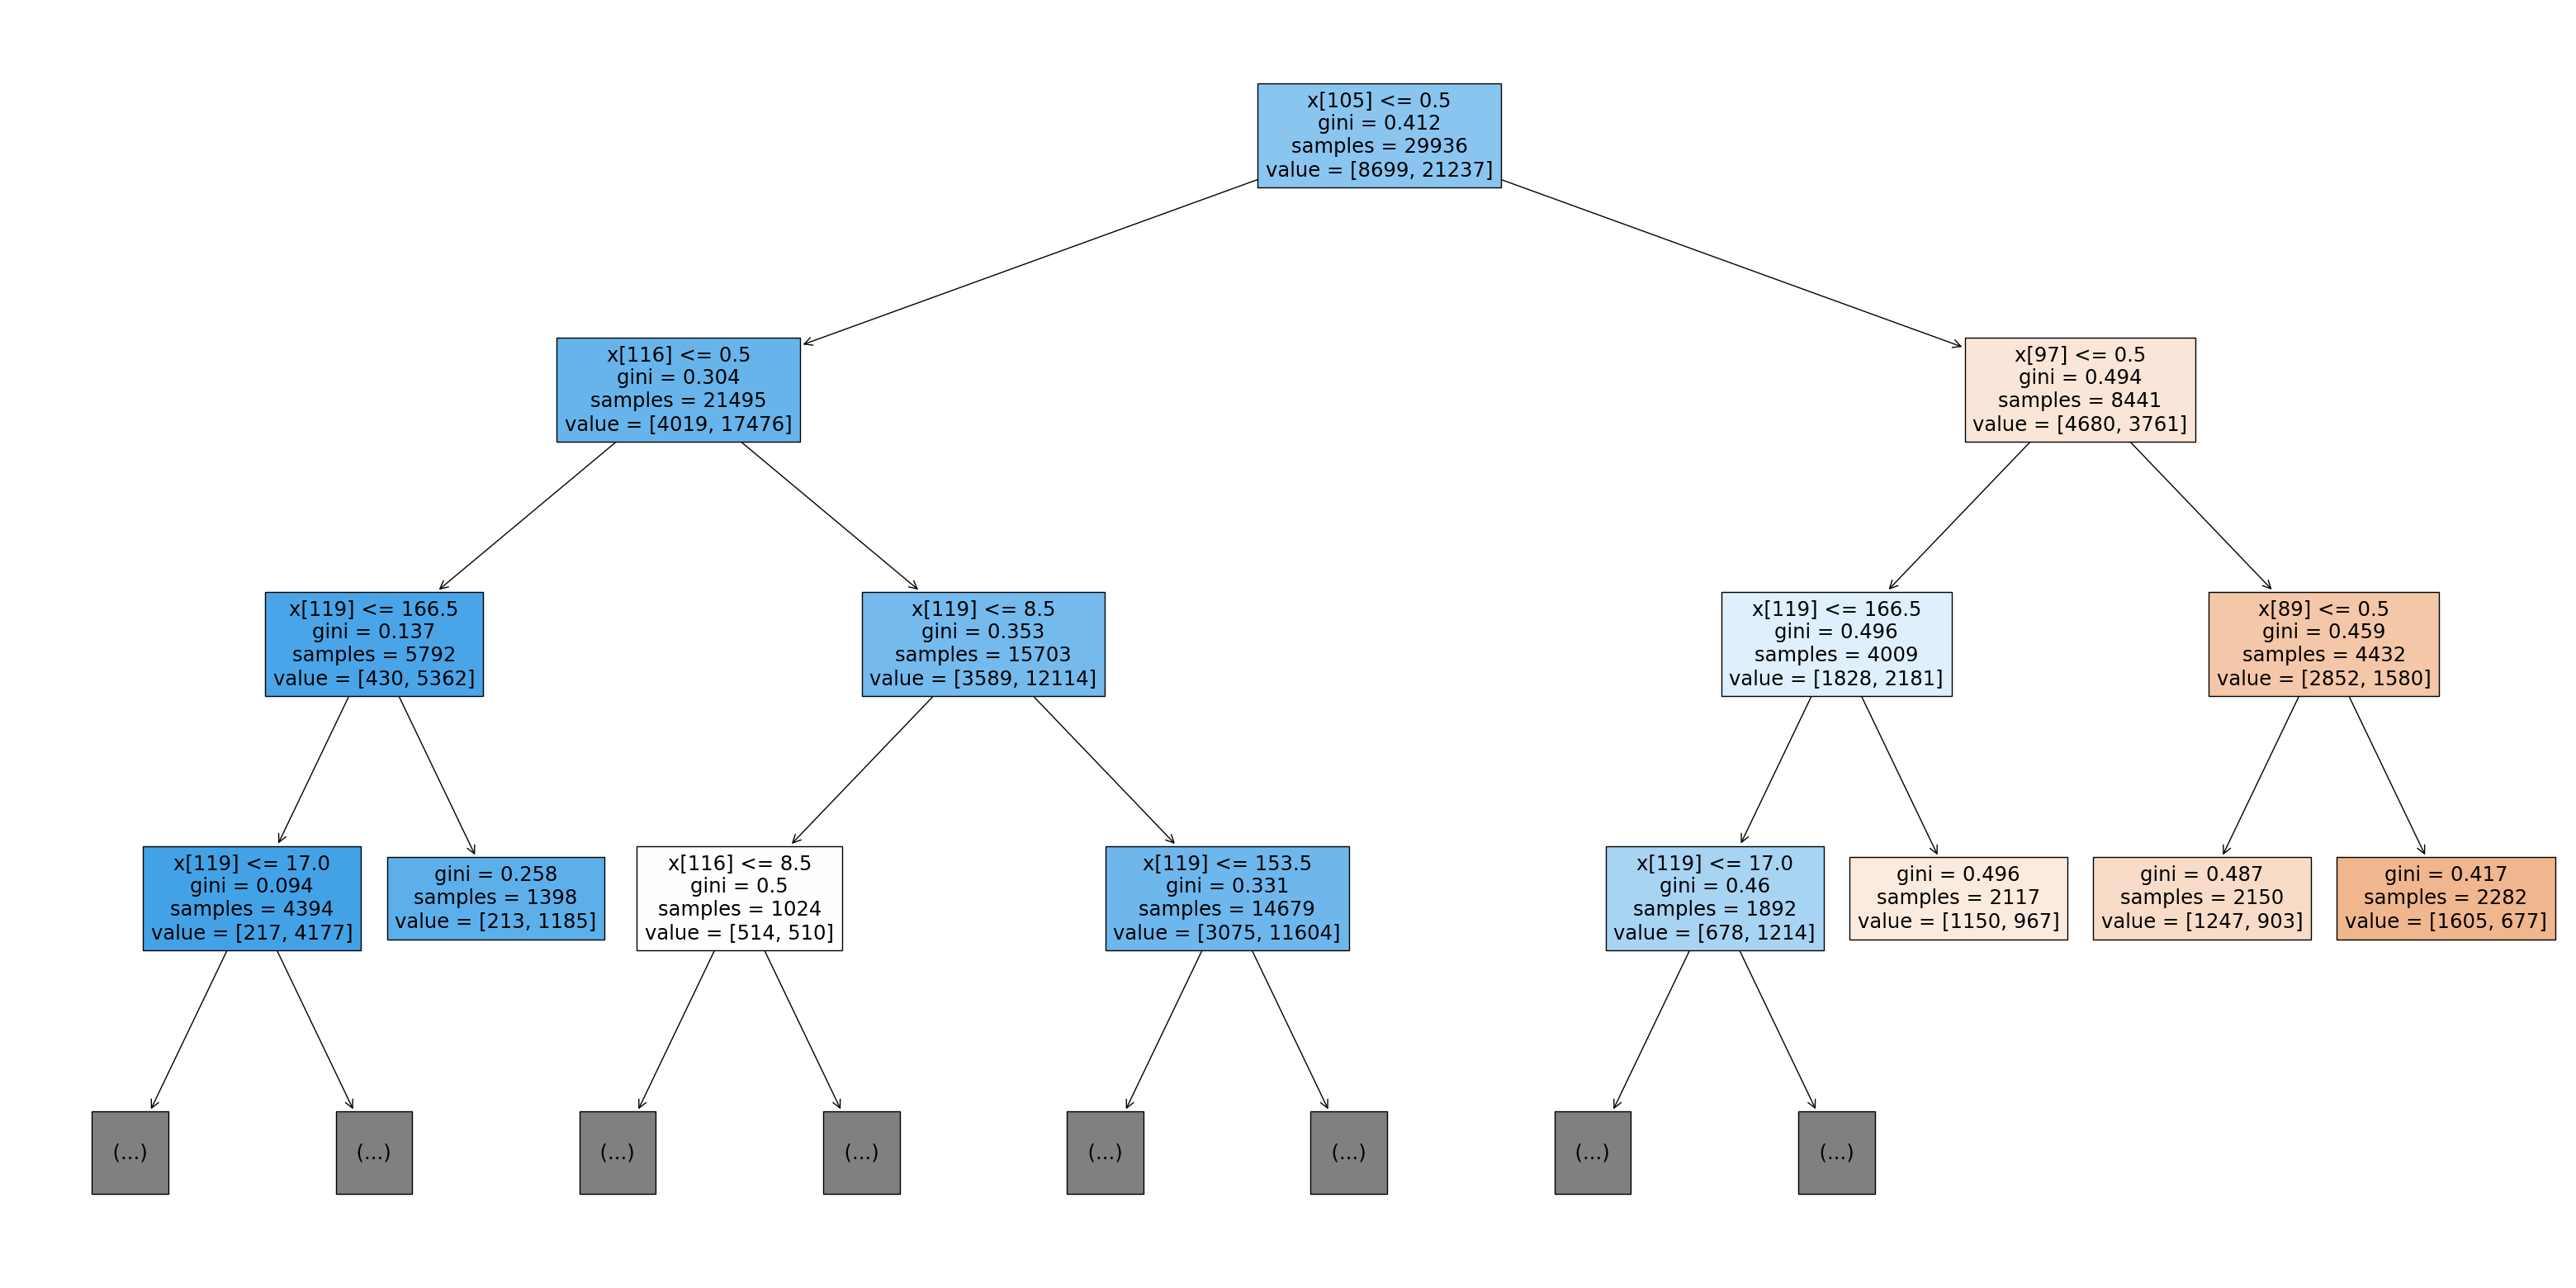

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(tree, filled=True, max_depth=3)
plt.show()

##Modelos para comparação

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_preds = nb.predict(X_test)
print("Acurácia no Treino = ", nb.score(X_train,y_train)*100 ,"%")
print("Acurácia no Teste = ", nb.score(X_test,y_test)*100 ,"%")

Acurácia no Treino =  74.62586851950829 %
Acurácia no Teste =  74.45216461785141 %


In [ ]:
RANDOM_STATE = 42

In [ ]:
xgb = XGBClassifier(objective='binary:logistic' ,
                    use_label_encoder=False,
                    random_state = RANDOM_STATE,
                    eval_metric='mlogloss')
xgb.fit(X_train,y_train)
xg_preds = xgb.predict(X_test)
print("Acurácia no Treino = ", xgb.score(X_train,y_train)*100 ,"%")
print("Acurácia no Teste = ", xgb.score(X_test,y_test)*100 ,"%")

Acurácia no Treino =  95.14297167290219 %
Acurácia no Teste =  86.11704970603955 %


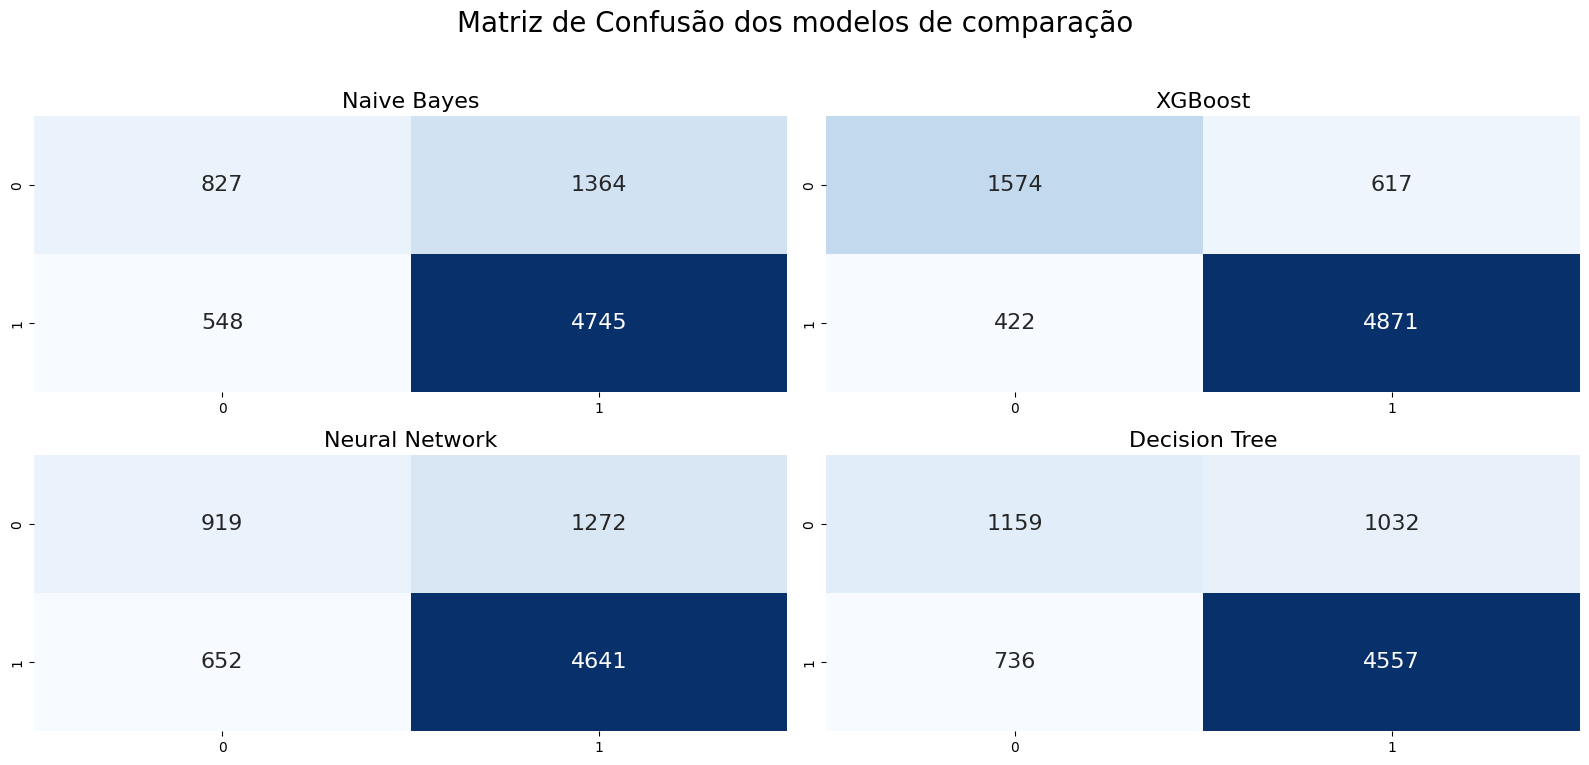

In [ ]:
nb_cm = confusion_matrix(y_test, nb_preds)
xgb_cm = confusion_matrix(y_test, xg_preds)
rn_cm = confusion_matrix(y_test,rn_y_pred_test)
dt_cm = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(16, 8))  # Ajusta o tamanho geral da figura
plt.suptitle("Matriz de Confusão dos modelos de comparação", fontsize=20)  # Título geral

# Naive Bayes
plt.subplot(2, 2, 1)
plt.title("Naive Bayes", fontsize=16)
sns.heatmap(nb_cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

# XGBoost
plt.subplot(2, 2, 2)  # Ajusta a posição para linha 1, coluna 2 de um layout 1x2
plt.title("XGBoost", fontsize=16)
sns.heatmap(xgb_cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

# Neural Network
plt.subplot(2, 2, 3)
plt.title("Neural Network", fontsize=16)
sns.heatmap(rn_cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

# Decision Tree
plt.subplot(2, 2, 4)
plt.title("Decision Tree", fontsize=16)
sns.heatmap(dt_cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para dar espaço ao título geral
plt.show()

In [ ]:
results = {'modelos': ['Neural Network', 'Decision Tree', 'Naive Bayes', 'XGBoost Classifier'], 'resultados': [76.5, 78.3, 74.75503295920186, 85.7830037413148]}
df = pd.DataFrame(data=results)
x = px.line(data_frame = results, x = ['Neural Network', 'Decision Tree', 'Naive Bayes', 'XGBoost Classifier'], y = ["resultados"] ,markers = True  )
x.update_xaxes(title="Modelo")
x.update_yaxes(title = "Acurácia")
x.update_layout(showlegend = True,
    title = {
        'text': 'Teste de comparação entre os 4 modelos',
        'y':0.94,'x':0.5,'xanchor': 'center','yanchor': 'top'})
x.show()